In [8]:
# モジュールのインポート
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
% matplotlib inline

data = pd.read_csv('titanic_train.csv')
y = data[['Survived']]
drop_col = ['Ticket', 'Cabin'] #Ticket(解読不可能), Cabin(欠損値多数)削除
data = data.drop(drop_col, axis=1)

In [9]:
Mr_mean = data[data.Name.str.contains("Mr.")].Age.mean() #Mrの年齢の平均
print("Mrの年齢の平均: " + str(Mr_mean))
Ms_mean = data[data.Name.str.contains("Ms.")].Age.mean() #Msの年齢の平均
print("Msの年齢の平均: " + str(Ms_mean))
Mrs_mean = data[data.Name.str.contains("Mrs.")].Age.mean() #Msの年齢の平均
print("Mrsの年齢の平均: " + str(Mrs_mean))
Master_mean = data[data.Name.str.contains("Master.")].Age.mean() #Masterの年齢の平均
print("Masterの年齢の平均: " + str(Master_mean))
Miss_mean = data[data.Name.str.contains("Miss.")].Age.mean() #Missの年齢の平均
print("Missの年齢の平均: " + str(Miss_mean))

Mrの年齢の平均: 33.11839530332681
Msの年齢の平均: 28.0
Mrsの年齢の平均: 35.642857142857146
Masterの年齢の平均: 4.574166666666667
Missの年齢の平均: 21.773972602739725


In [10]:
#新しくtitleカラムを追加し、敬称ごとに割り振り
data["title"] = np.zeros(len(data)).astype(int)

for i in range(len(data)):
    if "Mr." in data.Name[i]:
        data["title"][i] = 0
    elif "Ms." in data.Name[i]:
        data["title"][i] = 1
    elif "Mrs." in data.Name[i]:
        data["title"][i] = 2
    elif "Master." in data.Name[i]:
        data["title"][i] = 3
    elif "Miss." in data.Name[i]:
        data["title"][i] = 4

In [11]:
#AgeのNaNを-1で補完
data.Age = data.Age.fillna(-1)

In [12]:
#-1をそれぞれの敬称の年齢の平均で補完
for i in range(len(data)):
    if data.Age[i] == -1:
        if data.title[i] == 0:
            data.Age[i] = Mr_mean
        elif data.title[i] == 1:
            data.Age[i] = Ms_mean
        elif data.title[i] == 2:
            data.Age[i] = Mrs_mean
        elif data.title[i] == 3:
            data.Age[i] = Master_mean
        elif data.title[i] == 4:
            data.Age[i] = Miss_mean
    else:
        pass

In [13]:
data = data.drop(['Name'], axis=1) #Nameの削除

In [14]:
data = data.drop(['title'], axis=1) #titleの削除

In [15]:
dummy_embarked = pd.get_dummies(data["Embarked"])
dummy_sex = pd.get_dummies(data["Sex"])

In [16]:
data = data.drop(["Sex", "Embarked"], axis=1)
data = pd.concat((data, dummy_embarked), axis=1)
data = pd.concat((data, dummy_sex), axis=1)

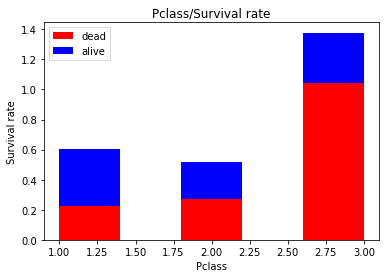

In [17]:
split_data = []
for survived in [0,1]:
    split_data.append(data[data.Survived==survived])
    
temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, bins=5, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True)
plt.title("Pclass/Survival rate")
plt.xlabel("Pclass")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示
plt.show()
#左から一等、二等、三等客室. 青が生存した人,赤が死亡した人.
#一等客室の乗客は半分以上が生き残っている.
#三等客室の乗客は1/5の人しか生き残っていない.
#→一等客室の乗客が優先されて救命ボートに乗った?

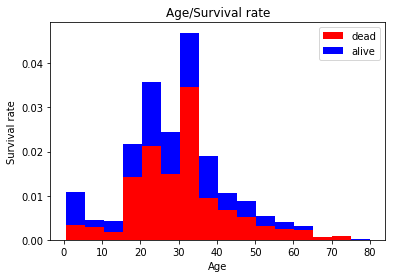

In [18]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=16)
plt.title("Age/Survival rate")
plt.xlabel("Age")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示
plt.show()
#お年寄りの生存率が低い.
#幼児の生存率はかなり高い.
#→赤ちゃんを連れた人は優先して救命ボートに乗れた?

In [19]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data = data.drop(["SibSp", "Parch"], axis=1)

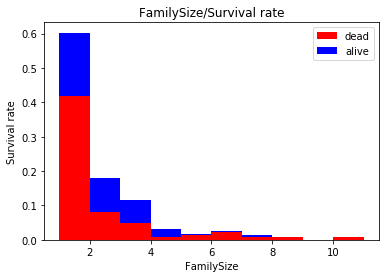

In [20]:
split_data = []
for survived in [0,1]:
    split_data.append(data[data.Survived==survived])
    
temp = [i["FamilySize"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=10)
plt.title("FamilySize/Survival rate")
plt.xlabel("FamilySize")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示
plt.show()

#5人以上の家族は生存率が低い.

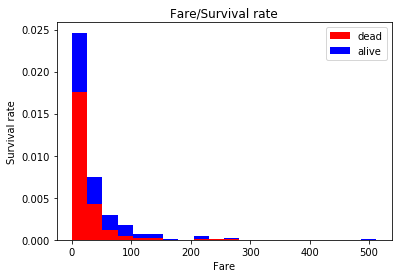

In [21]:
temp = [i["Fare"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=20)
plt.title("Fare/Survival rate")
plt.xlabel("Fare")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示
plt.show()
#Fareが安いと生存率が低い.

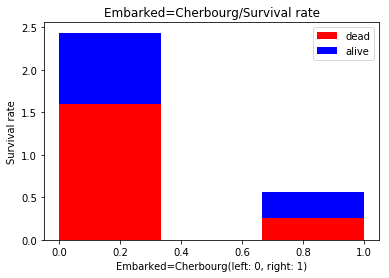

In [22]:
temp = [i["C"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=3)
plt.title("Embarked=Cherbourg/Survival rate")
plt.xlabel("Embarked=Cherbourg(left: 0, right: 1)")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示
plt.show()

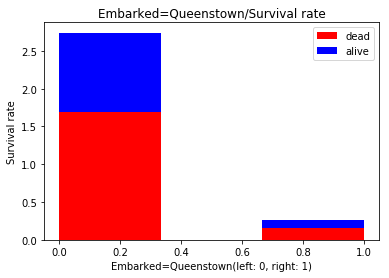

In [23]:
temp = [i["Q"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=3)
plt.title("Embarked=Queenstown/Survival rate")
plt.xlabel("Embarked=Queenstown(left: 0, right: 1)")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示

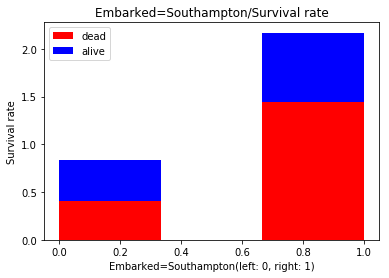

In [24]:
temp = [i["S"].dropna() for i in split_data]
plt.hist(temp, normed=True, color=['red', 'blue'], label=['dead', 'alive'], histtype='bar', stacked=True, bins=3)
plt.title("Embarked=Southampton/Survival rate")
plt.xlabel("Embarked=Southampton(left: 0, right: 1)")
plt.ylabel("Survival rate")
plt.legend() # 凡例を表示

#Cだけやや生存率高い？

In [25]:
# data = data[:, 2:]
data = data.drop(['PassengerId', 'Survived', 'C', 'Q', 'S'], axis=1)
columns = data.columns

In [26]:
data = data.values

In [27]:
columns = list(columns)
columns = np.array(columns)
columns

array(['Pclass', 'Age', 'Fare', 'female', 'male', 'FamilySize'],
      dtype='<U10')

In [28]:
y = y.values

In [29]:
# ランダムフォレストによる学習
from sklearn.cross_validation import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=1000)
rfc.fit(data_train, y_train)

# 正答率を出力
print('train accuracy: %.3f' % rfc.score(data_train, y_train))
print('test  accuracy: %.3f' % rfc.score(data_test, y_test))

/Users/sho/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train accuracy: 0.979
test  accuracy: 0.817


In [30]:
# 特徴量の重要度を出力
importances = rfc.feature_importances_
importances

array([ 0.07900539,  0.28792883,  0.26546713,  0.14156554,  0.14461794,
        0.08141518])

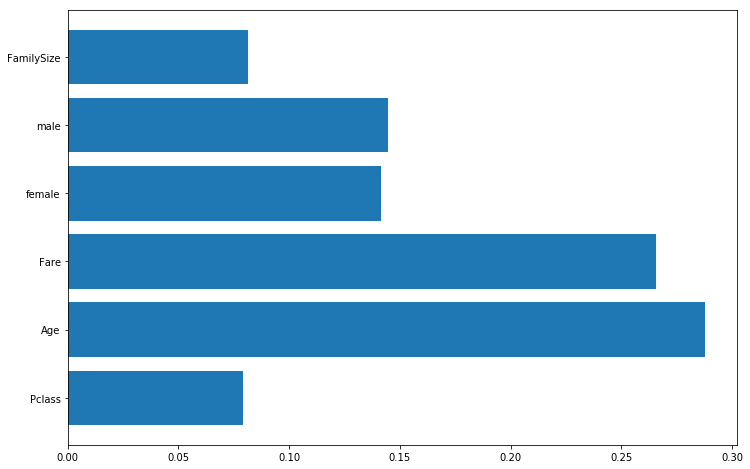

6

In [31]:
# 特徴量の重要度をグラフに出力
n_features = len(columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), columns)
plt.show()
n_features

#Embarked(乗船した港)は重要でない！

In [32]:
# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(data_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [33]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(data_train, y_train))
print('test  accuracy: %.3f' % gbct.score(data_test, y_test))
y_test_pred = gbct.predict(data_test)
y_test_pred

train accuracy: 0.904
test  accuracy: 0.832


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

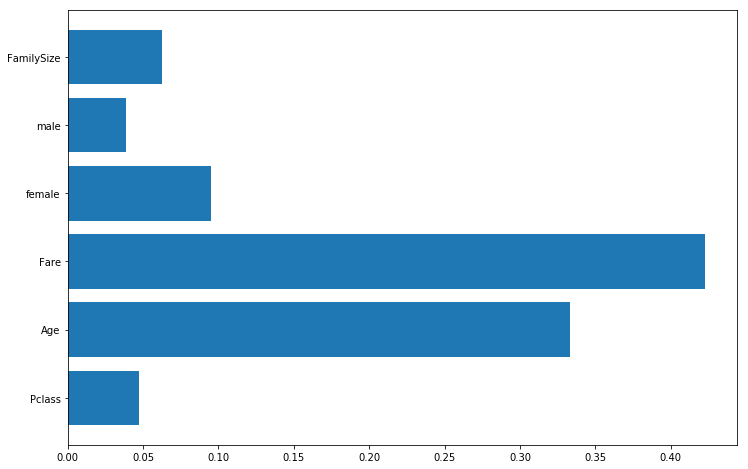

In [34]:
# 特徴量の重要度をグラフに出力
n_features = len(columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), gbct.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), columns)
plt.show()

In [35]:
from sklearn.grid_search import GridSearchCV

/Users/sho/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {
    'n_estimators'      : [5, 10, 30, 50, 100, 500],
    'random_state'      : [0],
    'min_samples_split' : [3, 5, 10, 20, 50, 100],
    'max_depth'         : [3, 5, 10]
}

In [38]:
classifier = GridSearchCV(RandomForestClassifier(), parameters)
classifier.fit(data_train, y_train)
print(classifier.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [39]:
classifier.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 0}

In [40]:
classifier.best_score_

0.8362760834670947

In [41]:
classifier.score(data_test, y_test)

0.83208955223880599